In [135]:
import pandas as pd
import numpy as np



In [136]:
df = pd.read_csv("Indicators_of_Anxiety_or_Depression.csv")

In [137]:
df1 = df.copy()

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16092 non-null  object 
 1   Group                   16092 non-null  object 
 2   State                   16092 non-null  object 
 3   Subgroup                16092 non-null  object 
 4   Phase                   16092 non-null  object 
 5   Time Period             16092 non-null  int64  
 6   Time Period Label       16092 non-null  object 
 7   Time Period Start Date  16092 non-null  object 
 8   Time Period End Date    16092 non-null  object 
 9   Value                   15386 non-null  float64
 10  Low CI                  15386 non-null  float64
 11  High CI                 15386 non-null  float64
 12  Confidence Interval     15386 non-null  object 
 13  Quartile Range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

In [139]:
df1.shape

(16092, 14)

In [140]:
df1.describe()

,Time Period,Value,Low CI,High CI
count,16092.000000,15386.000000,15386.000000,15386.000000
mean,34.392617,28.583979,25.058735,32.358612
std,20.681589,8.775480,8.446655,9.282907
min,1.000000,4.700000,3.300000,6.000000
25%,16.000000,22.700000,19.300000,26.100000
50%,35.000000,28.100000,24.500000,32.000000
75%,52.000000,33.600000,30.000000,37.700000
max,69.000000,85.200000,79.900000,89.500000


In [141]:
df1.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [142]:
df1.columns


Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

## Data Preparation:

    Load and Clean Data:
        Load the dataset into a pandas DataFrame.
        Check for and handle any missing values or inconsistencies.
        Convert time-related columns to appropriate datetime formats.

In [143]:
df1.isna().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      706
Low CI                     706
High CI                    706
Confidence Interval        706
Quartile Range            5534
dtype: int64

In [144]:
df1["Quartile Range"].unique()

array([nan, '16.5 - 20.7', '22.2 - 24.0', '24.1 - 28.7', '20.8 - 22.1',
       '21.7 - 27.8', '31.7 - 37.0', '30.4 - 31.6', '27.9 - 30.3',
       '25.6 - 33.3', '34.8 - 36.7', '36.8 - 41.4', '33.4 - 34.7',
       '20.7 - 23.0', '23.1 - 25.6', '25.7 - 35.5', '16.7 - 20.6',
       '26.3 - 28.7', '31.6 - 38.3', '28.8 - 31.5', '20.3 - 26.2',
       '30.6 - 33.4', '33.5 - 36.0', '36.1 - 48.4', '26.1 - 30.5',
       '18.1-20.7', '23.3-25.6', '25.7-36.4', '20.8-23.2', '19.0-25.2',
       '25.3-27.4', '28.9-36.1', '27.5-28.8', '23.8-29.7', '32.6-34.9',
       '29.8-32.5', '35.0-44.3', '17.2-20.9', '25.9-31.1', '23.0-25.8',
       '21.0-22.9', '24.8-28.6', '30.7-36.0', '28.7-30.6', '19.6-24.7',
       '24.8-29.5', '35.6-41.4', '33.2-35.5', '29.6-33.1', '26.9-31.8',
       '24.4-26.8', '21.5-24.3', '17.0-21.4', '29.7-31.7', '18.4-26.7',
       '26.8-29.6', '31.8-37.1', '37.0-40.0', '26.0-31.6', '31.7-34.2',
       '34.3-36.9', '27.3-30.3', '21.3-25.0', '25.1-27.2', '14.7-21.2',
       '32.8-36.3

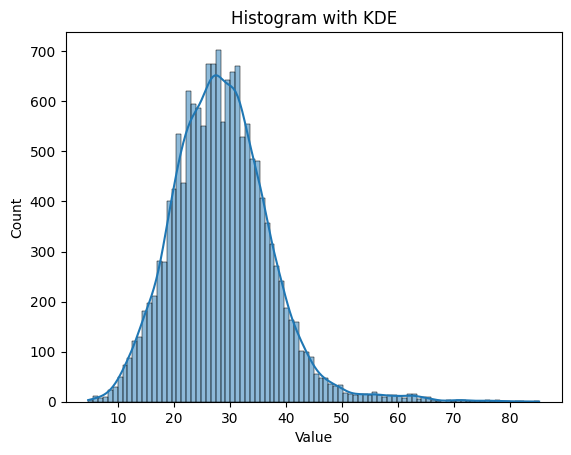

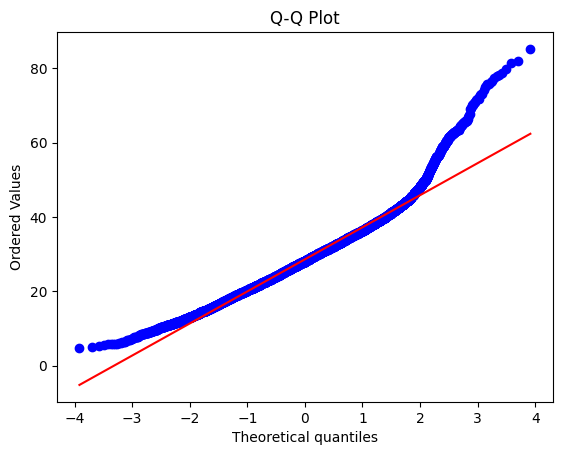

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
sns.histplot(df1['Value'], kde=True)
plt.title('Histogram with KDE')
plt.show()

# Q-Q Plot
stats.probplot(df1['Value'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [146]:
# for consistent or easy - convert all text in lowercase
df1.columns = df1.columns.str.lower()

In [147]:
# Calculate the mean of each column and fill missing values
df1['value'].fillna('mean')

0        23.5
1        32.7
2        25.7
3        24.8
4        23.2
         ... 
16087    20.7
16088    20.3
16089    22.8
16090    18.9
16091    20.3
Name: value, Length: 16092, dtype: object

In [148]:
m_val =df1['value'].aggregate('mean').round(2)

In [149]:
df1['value'].isna().sum()

706

In [150]:
df1['value'].fillna(m_val, inplace=True)

In [151]:
df1['value'].isna().sum()

0

In [152]:
df1['value'].unique()

array([23.5 , 32.7 , 25.7 , 24.8 , 23.2 , 18.4 , 13.6 , 14.4 , 20.8 ,
       26.1 , 29.4 , 21.4 , 25.6 , 23.6 , 28.3 , 25.4 , 17.6 , 18.6 ,
       19.2 , 22.4 , 26.6 , 22.  , 24.4 , 21.1 , 26.4 , 22.5 , 20.  ,
       20.6 , 23.3 , 16.5 , 22.1 , 28.1 , 19.5 , 20.9 , 25.9 , 25.5 ,
       20.4 , 22.9 , 21.  , 18.2 , 19.1 , 28.7 , 17.  , 21.2 , 24.7 ,
       24.5 , 21.6 , 17.5 , 22.2 , 20.7 , 21.5 , 23.4 , 18.9 , 30.8 ,
       40.2 , 34.4 , 34.1 , 31.  , 24.9 , 16.4 , 14.6 , 35.4 , 36.3 ,
       29.  , 32.8 , 26.3 , 38.2 , 37.3 , 30.6 , 33.5 , 27.  , 27.7 ,
       32.3 , 33.7 , 32.6 , 34.9 , 29.9 , 31.4 , 31.9 , 26.9 , 31.1 ,
       31.8 , 31.6 , 29.5 , 37.  , 32.5 , 28.5 , 30.3 , 30.4 , 22.8 ,
       24.2 , 31.3 , 27.9 , 36.1 , 30.  , 21.7 , 28.6 , 31.5 , 27.6 ,
       27.8 , 28.2 , 29.7 , 28.9 , 28.8 , 27.1 , 35.9 , 46.8 , 39.6 ,
       38.9 , 35.8 , 40.7 , 42.7 , 33.6 , 43.9 , 45.4 , 36.7 , 38.5 ,
       30.7 , 36.4 , 38.  , 37.4 , 34.7 , 37.6 , 36.8 , 36.2 , 33.3 ,
       36.6 , 37.8 ,

In [153]:
m_lowci= df1["low ci"].aggregate('mean')
m_lowci

25.058735213830754

In [154]:
df1["low ci"].fillna(m_lowci , inplace = True)

In [155]:
df1['low ci'].unique()

array([22.7       , 30.2       , 24.1       , 23.3       , 21.5       ,
       17.        , 11.8       ,  9.        , 19.6       , 25.2       ,
       26.8       , 20.6       , 23.7       , 20.3       , 24.8       ,
       27.8       , 23.9       , 24.4       , 16.8       , 14.6       ,
       19.4       , 22.3       , 22.5       , 20.1       , 17.6       ,
       22.1       , 19.7       , 21.4       , 14.9       , 17.3       ,
       13.7       , 18.3       , 16.        , 17.9       , 22.        ,
       17.7       , 18.7       , 15.3       , 19.1       , 16.5       ,
       20.4       , 24.6       , 17.1       , 18.2       , 16.4       ,
       21.6       , 19.9       , 13.        , 17.2       , 21.1       ,
       20.        , 15.9       , 18.        , 19.5       , 19.2       ,
       30.        , 38.1       , 32.6       , 32.1       , 29.        ,
       23.6       , 14.8       , 11.5       , 24.7       , 34.5       ,
       33.4       , 28.2       , 30.3       , 34.3       , 32.4 

In [156]:
m_highci = df1['high ci'].aggregate('mean').round(2)
df1['high ci'].fillna(m_highci, inplace = True)

In [157]:
df1["high ci"].unique()

array([24.3 , 35.2 , 27.3 , 26.2 , 25.  , 19.7 , 15.5 , 21.4 , 22.  ,
       27.1 , 32.1 , 22.1 , 27.5 , 32.  , 38.  , 26.9 , 18.4 , 23.1 ,
       21.8 , 25.5 , 31.3 , 28.6 , 24.9 , 29.1 , 31.1 , 25.4 , 30.2 ,
       26.1 , 24.1 , 27.2 , 31.  , 19.6 , 26.4 , 27.4 , 32.4 , 23.5 ,
       29.4 , 23.4 , 27.6 , 24.5 , 23.3 , 28.7 , 22.7 , 27.  , 33.1 ,
       25.6 , 20.7 , 25.7 , 28.1 , 29.7 , 27.8 , 27.9 , 26.  , 26.3 ,
       25.3 , 24.7 , 22.9 , 31.7 , 42.4 , 36.1 , 36.2 , 18.1 , 18.2 ,
       36.3 , 39.2 , 29.9 , 35.5 , 42.3 , 32.3 , 35.1 , 30.9 , 30.7 ,
       36.8 , 39.6 , 33.5 , 40.  , 34.6 , 35.6 , 35.9 , 37.8 , 35.4 ,
       36.4 , 31.2 , 35.3 , 39.3 , 33.3 , 40.7 , 36.7 , 28.  , 35.7 ,
       34.7 , 32.2 , 40.2 , 34.  , 33.7 , 35.8 , 31.8 , 33.9 , 29.2 ,
       49.3 , 41.5 , 37.7 , 30.3 , 23.7 , 41.6 , 45.7 , 34.4 , 41.4 ,
       48.1 , 50.5 , 38.2 , 31.5 , 43.1 , 40.6 , 39.7 , 45.3 , 41.3 ,
       39.8 , 42.9 , 36.9 , 40.4 , 43.7 , 38.1 , 36.6 , 44.4 , 40.5 ,
       31.4 , 32.7 ,

In [158]:
df1.isna().sum()

indicator                    0
group                        0
state                        0
subgroup                     0
phase                        0
time period                  0
time period label            0
time period start date       0
time period end date         0
value                        0
low ci                       0
high ci                      0
confidence interval        706
quartile range            5534
dtype: int64

In [159]:
df1.dtypes

indicator                  object
group                      object
state                      object
subgroup                   object
phase                      object
time period                 int64
time period label          object
time period start date     object
time period end date       object
value                     float64
low ci                    float64
high ci                   float64
confidence interval        object
quartile range             object
dtype: object

In [160]:
df1.duplicated() # duplicates check

0        False
1        False
2        False
3        False
4        False
         ...  
16087    False
16088    False
16089    False
16090    False
16091    False
Length: 16092, dtype: bool

In [18]:
df1["confidence interval"].unique()

array(['22.7 - 24.3', '30.2 - 35.2', '24.1 - 27.3', ..., '16.6 - 27.3',
       '17.5 - 23.4', '15.6 - 22.6'], dtype=object)

In [19]:
df1["confidence interval"]

0        22.7 - 24.3
1        30.2 - 35.2
2        24.1 - 27.3
3        23.3 - 26.2
4        21.5 - 25.0
            ...     
16087    17.9 - 23.8
16088    17.5 - 23.4
16089    19.2 - 26.8
16090    15.6 - 22.6
16091    15.8 - 25.5
Name: confidence interval, Length: 16092, dtype: object

In [161]:
df1[['low ci', 'high ci']]

,low ci,high ci
0,22.7,24.3
1,30.2,35.2
2,24.1,27.3
3,23.3,26.2
4,21.5,25.0
...,...,...
16087,17.9,23.8
16088,17.5,23.4
16089,19.2,26.8
16090,15.6,22.6


In [162]:
df1.columns

Index(['indicator', 'group', 'state', 'subgroup', 'phase', 'time period',
       'time period label', 'time period start date', 'time period end date',
       'value', 'low ci', 'high ci', 'confidence interval', 'quartile range'],
      dtype='object')

In [163]:
df1.shape

(16092, 14)

In [23]:
df1 = df1.drop(['quartile range',
       'ci_lower', 'ci_upper', 'ci_mean'], axis =1)

KeyError: "['ci_lower', 'ci_upper', 'ci_mean'] not found in axis"

In [164]:
df1.shape

(16092, 14)

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               16092 non-null  object 
 1   group                   16092 non-null  object 
 2   state                   16092 non-null  object 
 3   subgroup                16092 non-null  object 
 4   phase                   16092 non-null  object 
 5   time period             16092 non-null  int64  
 6   time period label       16092 non-null  object 
 7   time period start date  16092 non-null  object 
 8   time period end date    16092 non-null  object 
 9   value                   16092 non-null  float64
 10  low ci                  16092 non-null  float64
 11  high ci                 16092 non-null  float64
 12  confidence interval     15386 non-null  object 
 13  quartile range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

## date Time series 

In [166]:
df1[["time period start date","time period end date"]]

,time period start date,time period end date
0,04/23/2020,05/05/2020
1,04/23/2020,05/05/2020
2,04/23/2020,05/05/2020
3,04/23/2020,05/05/2020
4,04/23/2020,05/05/2020
...,...,...
16087,05/28/2024,06/24/2024
16088,05/28/2024,06/24/2024
16089,05/28/2024,06/24/2024
16090,05/28/2024,06/24/2024


In [167]:
# Convert time-related columns to appropriate datetime formats.
df1["time period start date"] = pd.to_datetime(df1['time period start date'],errors='coerce')
df1["time period end date"] = pd.to_datetime(df1['time period end date'], errors='coerce')


In [168]:
df1[["time period start date","time period end date"]]

,time period start date,time period end date
0,2020-04-23,2020-05-05
1,2020-04-23,2020-05-05
2,2020-04-23,2020-05-05
3,2020-04-23,2020-05-05
4,2020-04-23,2020-05-05
...,...,...
16087,2024-05-28,2024-06-24
16088,2024-05-28,2024-06-24
16089,2024-05-28,2024-06-24
16090,2024-05-28,2024-06-24


In [169]:
# Extract specific components such as year, month, day, etc.
df1["start_year"] = df1['time period start date'].dt.year
df1["start_month"] = df1['time period start date'].dt.month
df1["start_day"] = df1['time period start date'].dt.day

df1["end_year"] = df1['time period end date'].dt.year
df1["end_month"] = df1['time period end date'].dt.month
df1["end_day"] = df1['time period end date'].dt.day

In [170]:
df1.head()

,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,low ci,high ci,confidence interval,quartile range,start_year,start_month,start_day,end_year,end_month,end_day
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,2020,4,23,2020,5,5
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,2020,4,23,2020,5,5
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,2020,4,23,2020,5,5
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,2020,4,23,2020,5,5
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,2020,4,23,2020,5,5


In [171]:
#Compute the difference between two dates to get the duration.
df1["duration"] = df1['time period start date'] - df1['time period end date']

In [172]:
df1[["duration",'time period start date','time period end date']]


,duration,time period start date,time period end date
0,-12 days,2020-04-23,2020-05-05
1,-12 days,2020-04-23,2020-05-05
2,-12 days,2020-04-23,2020-05-05
3,-12 days,2020-04-23,2020-05-05
4,-12 days,2020-04-23,2020-05-05
...,...,...,...
16087,-27 days,2024-05-28,2024-06-24
16088,-27 days,2024-05-28,2024-06-24
16089,-27 days,2024-05-28,2024-06-24
16090,-27 days,2024-05-28,2024-06-24


In [173]:
# extract duration in days
df1["duration_days"]= df1["duration"].dt.days
df1[["duration_days","duration"]]

,duration_days,duration
0,-12,-12 days
1,-12,-12 days
2,-12,-12 days
3,-12,-12 days
4,-12,-12 days
...,...,...
16087,-27,-27 days
16088,-27,-27 days
16089,-27,-27 days
16090,-27,-27 days


In [174]:
df1["time period start date"].unique()

<DatetimeArray>
['2020-04-23 00:00:00', '2020-05-07 00:00:00', '2020-05-14 00:00:00',
 '2020-05-21 00:00:00', '2020-05-28 00:00:00', '2020-06-04 00:00:00',
 '2020-06-11 00:00:00', '2020-06-18 00:00:00', '2020-06-25 00:00:00',
 '2020-07-02 00:00:00', '2020-07-09 00:00:00', '2020-07-16 00:00:00',
 '2020-07-22 00:00:00', '2020-08-19 00:00:00', '2020-09-02 00:00:00',
 '2020-09-16 00:00:00', '2020-09-30 00:00:00', '2020-10-14 00:00:00',
 '2020-10-28 00:00:00', '2020-11-11 00:00:00', '2020-11-25 00:00:00',
 '2020-12-09 00:00:00', '2020-12-22 00:00:00', '2021-01-06 00:00:00',
 '2021-01-20 00:00:00', '2021-02-03 00:00:00', '2021-02-17 00:00:00',
 '2021-03-03 00:00:00', '2021-03-17 00:00:00', '2021-03-30 00:00:00',
 '2021-04-14 00:00:00', '2021-04-28 00:00:00', '2021-05-12 00:00:00',
 '2021-05-26 00:00:00', '2021-06-09 00:00:00', '2021-06-23 00:00:00',
 '2021-07-06 00:00:00', '2021-07-21 00:00:00', '2021-08-04 00:00:00',
 '2021-08-18 00:00:00', '2021-09-01 00:00:00', '2021-09-15 00:00:00',
 '20

In [175]:
# filter data by date
# filter bsed on specific range
filtered_df= df1[df1["time period start date"].dt.year == 2024]
filtered_df


,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,...,confidence interval,quartile range,start_year,start_month,start_day,end_year,end_month,end_day,duration,duration_days
14634,Symptoms of Depressive Disorder,National Estimate,United States,United States,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,13.4,...,12.9 - 13.9,NaN,2024,1,9,2024,2,5,-27 days,-27
14635,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,23.6,...,21.3 - 25.9,NaN,2024,1,9,2024,2,5,-27 days,-27
14636,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,15.9,...,14.7 - 17.0,NaN,2024,1,9,2024,2,5,-27 days,-27
14637,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,13.2,...,12.2 - 14.3,NaN,2024,1,9,2024,2,5,-27 days,-27
14638,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,12.1,...,11.0 - 13.3,NaN,2024,1,9,2024,2,5,-27 days,-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,20.7,...,17.9 - 23.8,19.2-20.8,2024,5,28,2024,6,24,-27 days,-27
16088,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,20.3,...,17.5 - 23.4,19.2-20.8,2024,5,28,2024,6,24,-27 days,-27
16089,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,22.8,...,19.2 - 26.8,22.4-24.6,2024,5,28,2024,6,24,-27 days,-27
16090,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,18.9,...,15.6 - 22.6,14.8-19.1,2024,5,28,2024,6,24,-27 days,-27


In [176]:
# Filter data between two dates
start_date = '2024-01-01'
end_date = '2024-03-31'
filtered_df = df1[(df1['time period start date'] >= start_date) & (df1['time period end date'] <= end_date)]
filtered_df

,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,...,confidence interval,quartile range,start_year,start_month,start_day,end_year,end_month,end_day,duration,duration_days
14634,Symptoms of Depressive Disorder,National Estimate,United States,United States,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,13.4,...,12.9 - 13.9,NaN,2024,1,9,2024,2,5,-27 days,-27
14635,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,23.6,...,21.3 - 25.9,NaN,2024,1,9,2024,2,5,-27 days,-27
14636,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,15.9,...,14.7 - 17.0,NaN,2024,1,9,2024,2,5,-27 days,-27
14637,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,13.2,...,12.2 - 14.3,NaN,2024,1,9,2024,2,5,-27 days,-27
14638,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,4.0,64,"Jan 9 - Feb 5, 2024",2024-01-09,2024-02-05,12.1,...,11.0 - 13.3,NaN,2024,1,9,2024,2,5,-27 days,-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15151,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,21.4,...,18.8 - 24.3,21.0-23.3,2024,2,6,2024,3,4,-27 days,-27
15152,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,20.9,...,18.7 - 23.2,19.0-20.9,2024,2,6,2024,3,4,-27 days,-27
15153,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,18.6,...,14.4 - 23.4,16.4-18.9,2024,2,6,2024,3,4,-27 days,-27
15154,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.0,65,"Feb 6 - Mar 4, 2024",2024-02-06,2024-03-04,17.0,...,14.1 - 20.2,16.4-18.9,2024,2,6,2024,3,4,-27 days,-27


In [177]:
# Resample data to a different frequency (e.g., monthly, yearly) and aggregate values.
df1.set_index(df1["time period start date"], inplace = True)

In [178]:
df1["time period start date"].dtype

dtype('<M8[ns]')

In [179]:
# resampled_monthly = df1.resample('M').mean()
select_numeric = df1.select_dtypes(include = ["number"])
resampled_monthly = select_numeric.resample('M').mean()
resampled_monthly

,time period,value,low ci,high ci,start_year,start_month,start_day,end_year,end_month,end_day,duration,duration_days
time period start date,,,,,,,,,,,,
2020-04-30,1.000000,29.150952,25.741905,32.783810,2020.0,4.0,23.000000,2020.000000,5.000000,5.000000,-12 days +00:00:00,-12.000000
2020-05-31,3.500000,28.720000,24.812024,32.946071,2020.0,5.0,17.500000,2020.000000,5.250000,14.750000,-5 days +00:00:00,-5.000000
2020-06-30,7.500000,30.483452,26.632738,34.603810,2020.0,6.0,14.500000,2020.000000,6.000000,19.500000,-5 days +00:00:00,-5.000000
2020-07-31,10.170306,33.328180,29.469065,37.397846,2020.0,7.0,10.078603,2020.000000,7.082969,14.331878,-7 days +04:11:31.703056769,-6.825328
2020-08-31,13.000000,29.938571,27.065238,32.973333,2020.0,8.0,19.000000,2020.000000,8.000000,31.000000,-12 days +00:00:00,-12.000000
2020-09-30,15.000000,30.651111,27.563968,33.900794,2020.0,9.0,16.000000,2020.000000,9.333333,18.000000,-12 days +00:00:00,-12.000000
2020-10-31,17.500000,33.188333,29.456905,37.115952,2020.0,10.0,21.000000,2020.000000,10.500000,17.500000,-12 days +00:00:00,-12.000000
2020-11-30,19.500000,35.436429,31.601190,39.445238,2020.0,11.0,18.000000,2020.000000,11.500000,15.000000,-12 days +00:00:00,-12.000000
2020-12-31,16.730337,34.362397,30.573213,38.347266,2020.0,12.0,11.775281,2020.213483,9.651685,17.584270,-13 days +13:45:10.112359551,-12.426966


## craete time series plots

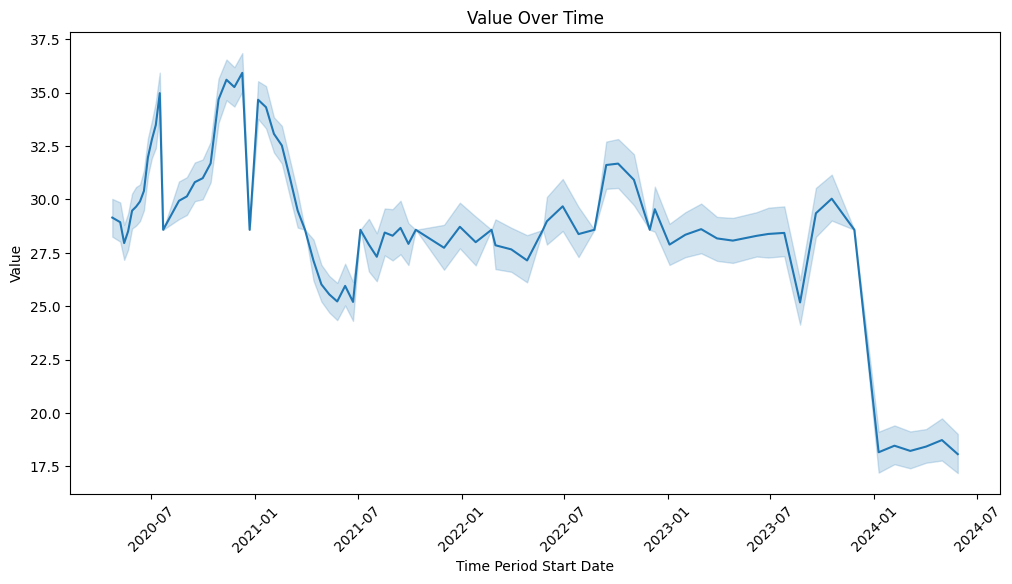

ValueError: Could not interpret value `mean ci` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [180]:
# Visualize time series data to identify trends and patterns.
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting value over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='time period start date', y='value')
plt.title('Value Over Time')
plt.xlabel('Time Period Start Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Example: Plotting mean confidence interval over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='time period start date', y='mean ci')
plt.title('Mean Confidence Interval Over Time')
plt.xlabel('Time Period Start Date')
plt.ylabel('Mean Confidence Interval')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df1['time period end date']

In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
# aggregate date by time period
# Group by year and calculate mean value
yearly_summary = df1.groupby(df1["time period start date"].dt.year).agg({'value':'mean', 'mean ci':'mean'})
yearly_summary


In [181]:
df1.columns

Index(['indicator', 'group', 'state', 'subgroup', 'phase', 'time period',
       'time period label', 'time period start date', 'time period end date',
       'value', 'low ci', 'high ci', 'confidence interval', 'quartile range',
       'start_year', 'start_month', 'start_day', 'end_year', 'end_month',
       'end_day', 'duration', 'duration_days'],
      dtype='object')

In [182]:
df1.head()

,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,...,confidence interval,quartile range,start_year,start_month,start_day,end_year,end_month,end_day,duration,duration_days
time period start date,,,,,,,,,,,,,,,,,,,,,
2020-04-23,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,...,22.7 - 24.3,NaN,2020,4,23,2020,5,5,-12 days,-12
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,...,30.2 - 35.2,NaN,2020,4,23,2020,5,5,-12 days,-12
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,...,24.1 - 27.3,NaN,2020,4,23,2020,5,5,-12 days,-12
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,...,23.3 - 26.2,NaN,2020,4,23,2020,5,5,-12 days,-12
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,...,21.5 - 25.0,NaN,2020,4,23,2020,5,5,-12 days,-12


In [183]:
# Group by 'indicator' and 'state' and calculate the mean of 'value' and 'mean ci'
grp_ind_sta = df1.groupby(['indicator', 'state']).agg({
    'value': 'mean',
    'mean ci': 'mean'
})
grp_ind_sta

KeyError: "Column(s) ['mean ci'] do not exist"

In [184]:
df1.set_index(df1["time period start date"], inplace = True)

In [185]:
grouped =df1.groupby(['indicator', 'group', 'state', 'subgroup'])
grouped

In [186]:
resampled_by_year = grouped.resample('Y').agg({
    'value': 'mean',   # Aggregating 'value' column
    'mean ci': 'mean'  # Aggregating 'mean
})

KeyError: "Column(s) ['mean ci'] do not exist"

In [187]:
resampled_by_year

value  \
indicator                       group             state         subgroup      time period start date          
Symptoms of Anxiety Disorder    By Age            United States 18 - 29 years 2020-12-31              28.58   
                                                                              2021-12-31              28.58   
                                                                              2022-12-31              28.58   
                                                                              2023-12-31              28.58   
                                                                              2024-12-31              28.58   
...                                                                                                     ...   
Symptoms of Depressive Disorder National Estimate United States United States 2020-12-31              28.58   
                                                                              2021-12-31              28.58   
                                                                              2022-12-31              28.58   
                                                                              2023-12-31              28.58   
                                                                              2024-12-31              28.58   

                                                                                                      mean ci  
indicator                       group             state         subgroup      time period start date           
Symptoms of Anxiety Disorder    By Age            United States 18 - 29 years 2020-12-31                57.42  
                                                                              2021-12-31                57.42  
                                                                              2022-12-31                57.42  
                                                                              2023-12-31                57.42  
                                                                              2024-12-31                57.42  
...                                                                                                       ...  
Symptoms of Depressive Disorder National Estimate United States United States 2020-12-31                57.42  
                                                                              2021-12-31                57.42  
                                                                              2022-12-31                57.42  
                                                                              2023-12-31                57.42  
                                                                              2024-12-31                57.42  

[1146 rows x 2 columns]

In [188]:
df1['indicator']

time period start date
2020-04-23                      Symptoms of Depressive Disorder
2020-04-23                      Symptoms of Depressive Disorder
2020-04-23                      Symptoms of Depressive Disorder
2020-04-23                      Symptoms of Depressive Disorder
2020-04-23                      Symptoms of Depressive Disorder
                                    ...                        
2024-05-28    Symptoms of Anxiety Disorder or Depressive Dis...
2024-05-28    Symptoms of Anxiety Disorder or Depressive Dis...
2024-05-28    Symptoms of Anxiety Disorder or Depressive Dis...
2024-05-28    Symptoms of Anxiety Disorder or Depressive Dis...
2024-05-28    Symptoms of Anxiety Disorder or Depressive Dis...
Name: indicator, Length: 16092, dtype: object

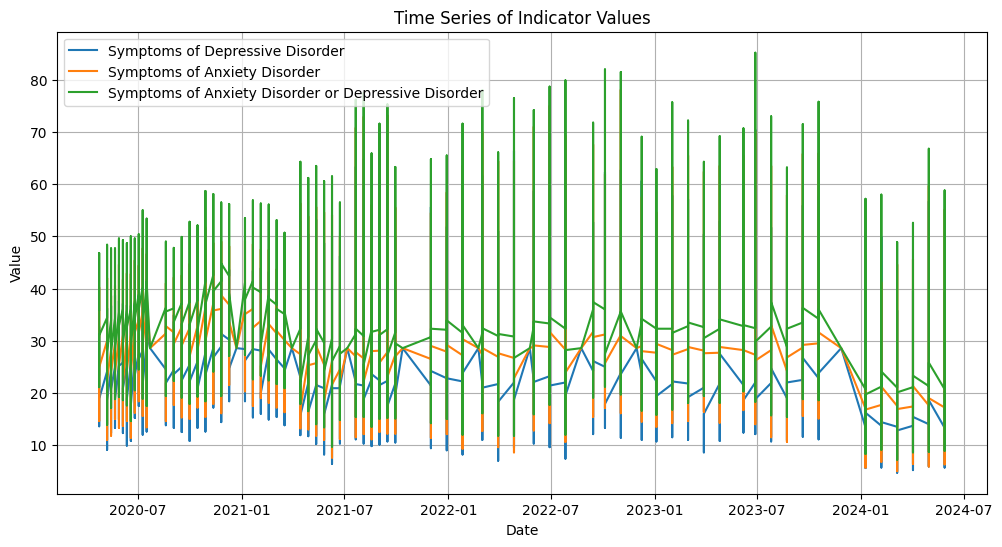

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and 'time period start date' is the index

plt.figure(figsize=(12, 6))
for indicator in df1['indicator'].unique():
    subset = df1[df1['indicator'] == indicator]
    plt.plot(subset.index, subset['value'], label=indicator)

plt.title('Time Series of Indicator Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


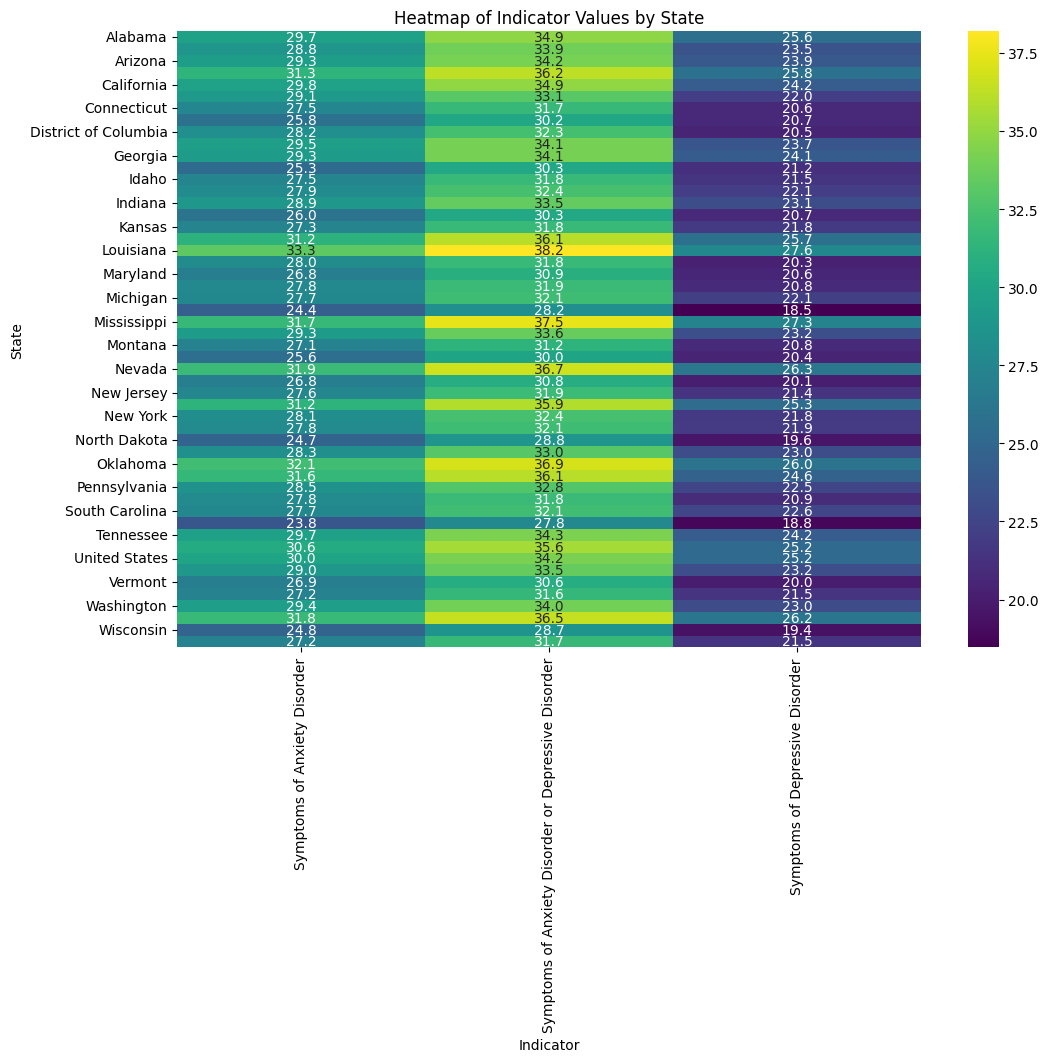

In [190]:
# Pivot table for heatmap
pivot_table = df1.pivot_table(values='value', index='state', columns='indicator', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.1f')
plt.title('Heatmap of Indicator Values by State')
plt.xlabel('Indicator')
plt.ylabel('State')
plt.show()


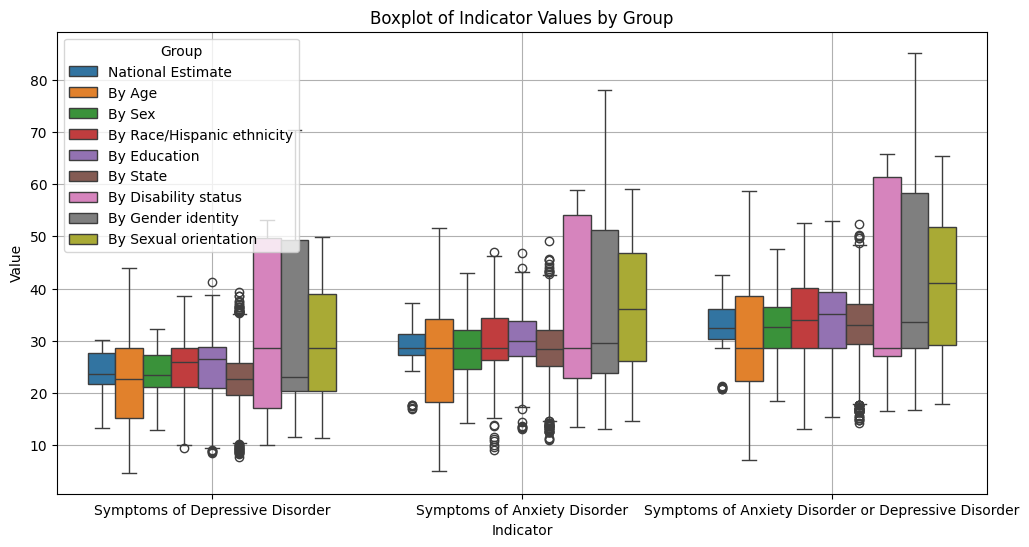

In [191]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='indicator', y='value', hue='group')
plt.title('Boxplot of Indicator Values by Group')
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.legend(title='Group')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

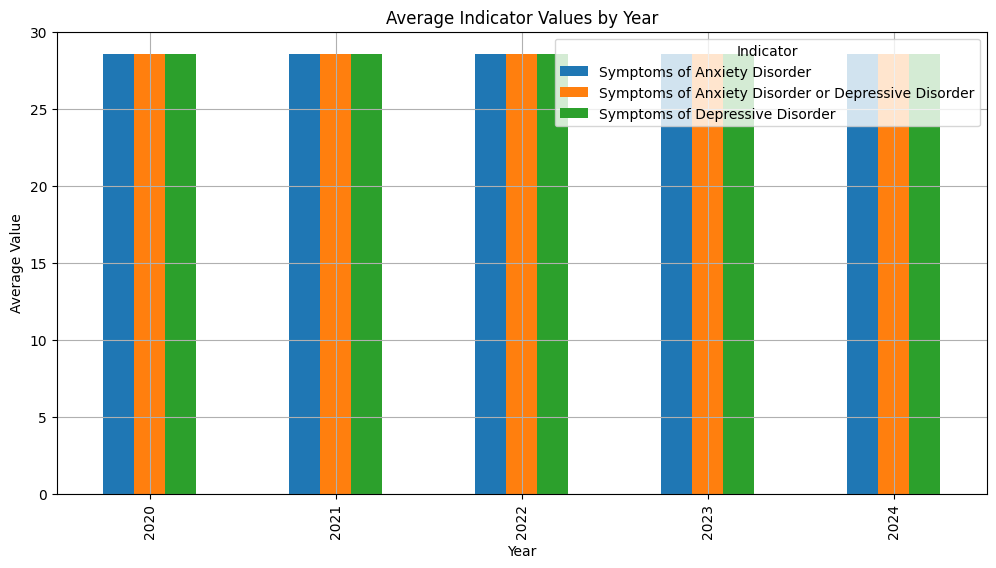

In [52]:
# Convert 'time period start date' to year for aggregation
df1['year'] = df1.index.year

# Group by year and indicator, then calculate mean
yearly_avg = df1.groupby(['year', 'indicator'])['value'].mean().unstack()

plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Indicator Values by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(title='Indicator')
plt.grid(True)
plt.show()


In [193]:
df1.columns

Index(['indicator', 'group', 'state', 'subgroup', 'phase', 'time period',
       'time period label', 'time period start date', 'time period end date',
       'value', 'low ci', 'high ci', 'confidence interval', 'quartile range',
       'start_year', 'start_month', 'start_day', 'end_year', 'end_month',
       'end_day', 'duration', 'duration_days'],
      dtype='object')

In [194]:
# Selecting only a few columns for pairplot
df_pairplot = df1[['indicator', 'value','confidence interval'].copy()
df_pairplot['indicator'] = df_pairplot['indicator'].astype('category')

sns.pairplot(df_pairplot, hue='indicator')
plt.title('Pairplot of Indicators')
plt.show()


SyntaxError: invalid syntax (633971187.py, line 3)

In [62]:
# Filter data for age groups
age_group_data = df1[df1['subgroup'].str.contains('years')]

age_group_data


,indicator,group,state,subgroup,phase,time period,time period label,time period start date,time period end date,value,...,mean ci,start_year,start_month,start_day,end_year,end_month,end_day,duration,duration_days,year
time period start date,,,,,,,,,,,,,,,,,,,,,
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,57.42,2020,4,23,2020,5,5,-12 days,-12,2020
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,57.42,2020,4,23,2020,5,5,-12 days,-12,2020
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,57.42,2020,4,23,2020,5,5,-12 days,-12,2020
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,57.42,2020,4,23,2020,5,5,-12 days,-12,2020
2020-04-23,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1.0,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.58,...,57.42,2020,4,23,2020,5,5,-12 days,-12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-28,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,28.58,...,57.42,2024,5,28,2024,6,24,-27 days,-27,2024
2024-05-28,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,28.58,...,57.42,2024,5,28,2024,6,24,-27 days,-27,2024
2024-05-28,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,4.1,69,"May 28 - Jun 24, 2024",2024-05-28,2024-06-24,28.58,...,57.42,2024,5,28,2024,6,24,-27 days,-27,2024


In [67]:
df1.dtypes

indicator                          object
group                              object
state                              object
subgroup                           object
phase                              object
time period                         int64
time period label                  object
time period start date     datetime64[ns]
time period end date       datetime64[ns]
value                             float64
low ci                            float64
high ci                           float64
confidence interval                object
quartile range                     object
mean ci                           float64
start_year                          int32
start_month                         int32
start_day                           int32
end_year                            int32
end_month                           int32
end_day                             int32
duration                  timedelta64[ns]
duration_days                       int64
year                              

In [71]:
print(type(age_group_data))  # Should be <class 'pandas.core.frame.DataFrame'>
print(age_group_data.head())  # Check the first few rows of the DataFrame
print(age_group_data.columns)  # Ensure columns are correct


<class 'pandas.core.frame.DataFrame'>
                                              indicator   group  \
time period start date                                            
2020-04-23              Symptoms of Depressive Disorder  By Age   
2020-04-23              Symptoms of Depressive Disorder  By Age   
2020-04-23              Symptoms of Depressive Disorder  By Age   
2020-04-23              Symptoms of Depressive Disorder  By Age   
2020-04-23              Symptoms of Depressive Disorder  By Age   

                                state       subgroup phase  time period  \
time period start date                                                    
2020-04-23              United States  18 - 29 years   1.0            1   
2020-04-23              United States  30 - 39 years   1.0            1   
2020-04-23              United States  40 - 49 years   1.0            1   
2020-04-23              United States  50 - 59 years   1.0            1   
2020-04-23              United States  60 

In [75]:

# Filter data for age groups
age_group_data = df1[df1['subgroup'].str.contains('years')]

# Time Series Analysis by Age Group
plt.figure(figsize=(14, 8))
sns.lineplot(df1='age_group_data', x='time period start date', y='value', hue='subgroup')
plt.title('Time Series Analysis by Age Group')
plt.xlabel('Time Period Start Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `time period start date` for `x`. Value is a string, but `data` was not passed.

<Figure size 1400x800 with 0 Axes>

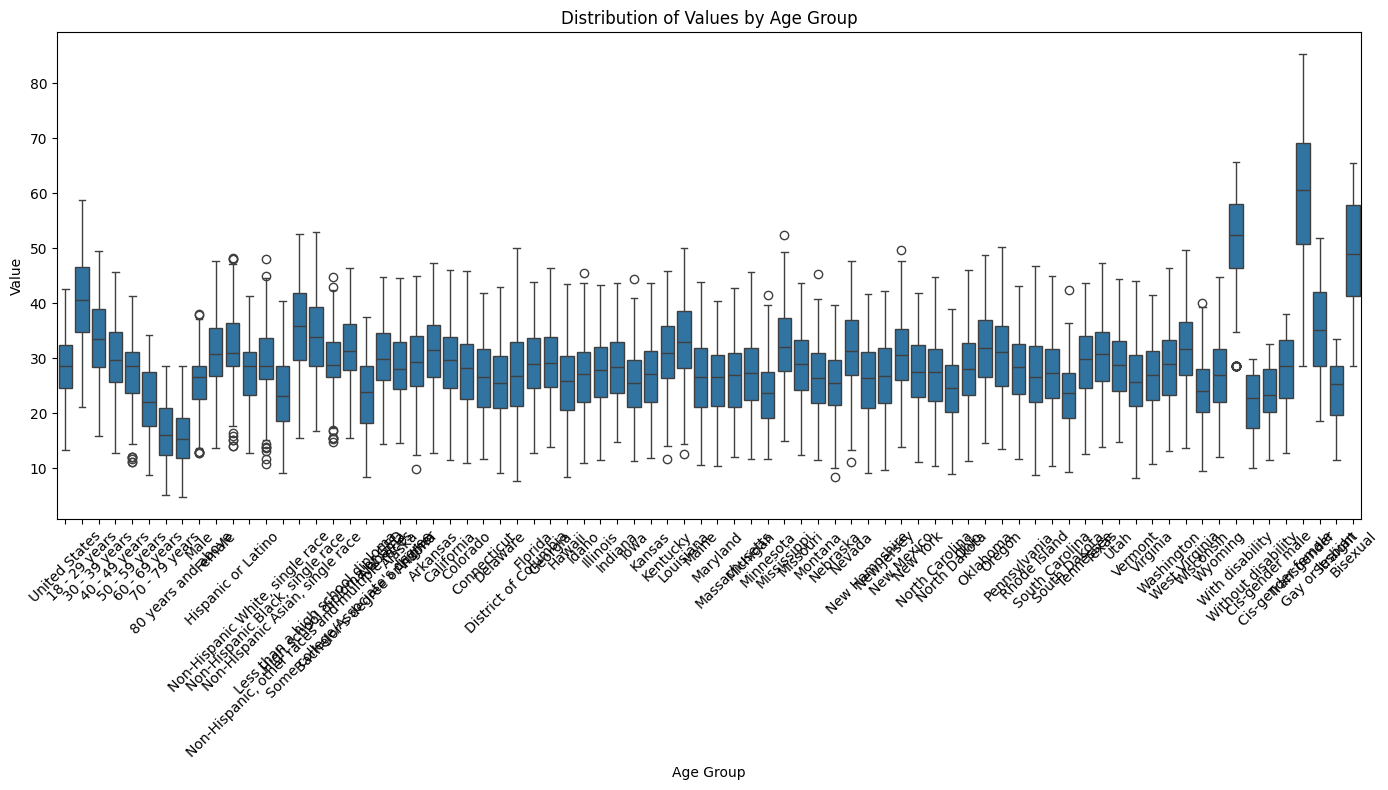

In [195]:
# Distribution of Values by Age Group
plt.figure(figsize=(14, 8))
sns.boxplot(df1, x='subgroup', y='value')
plt.title('Distribution of Values by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

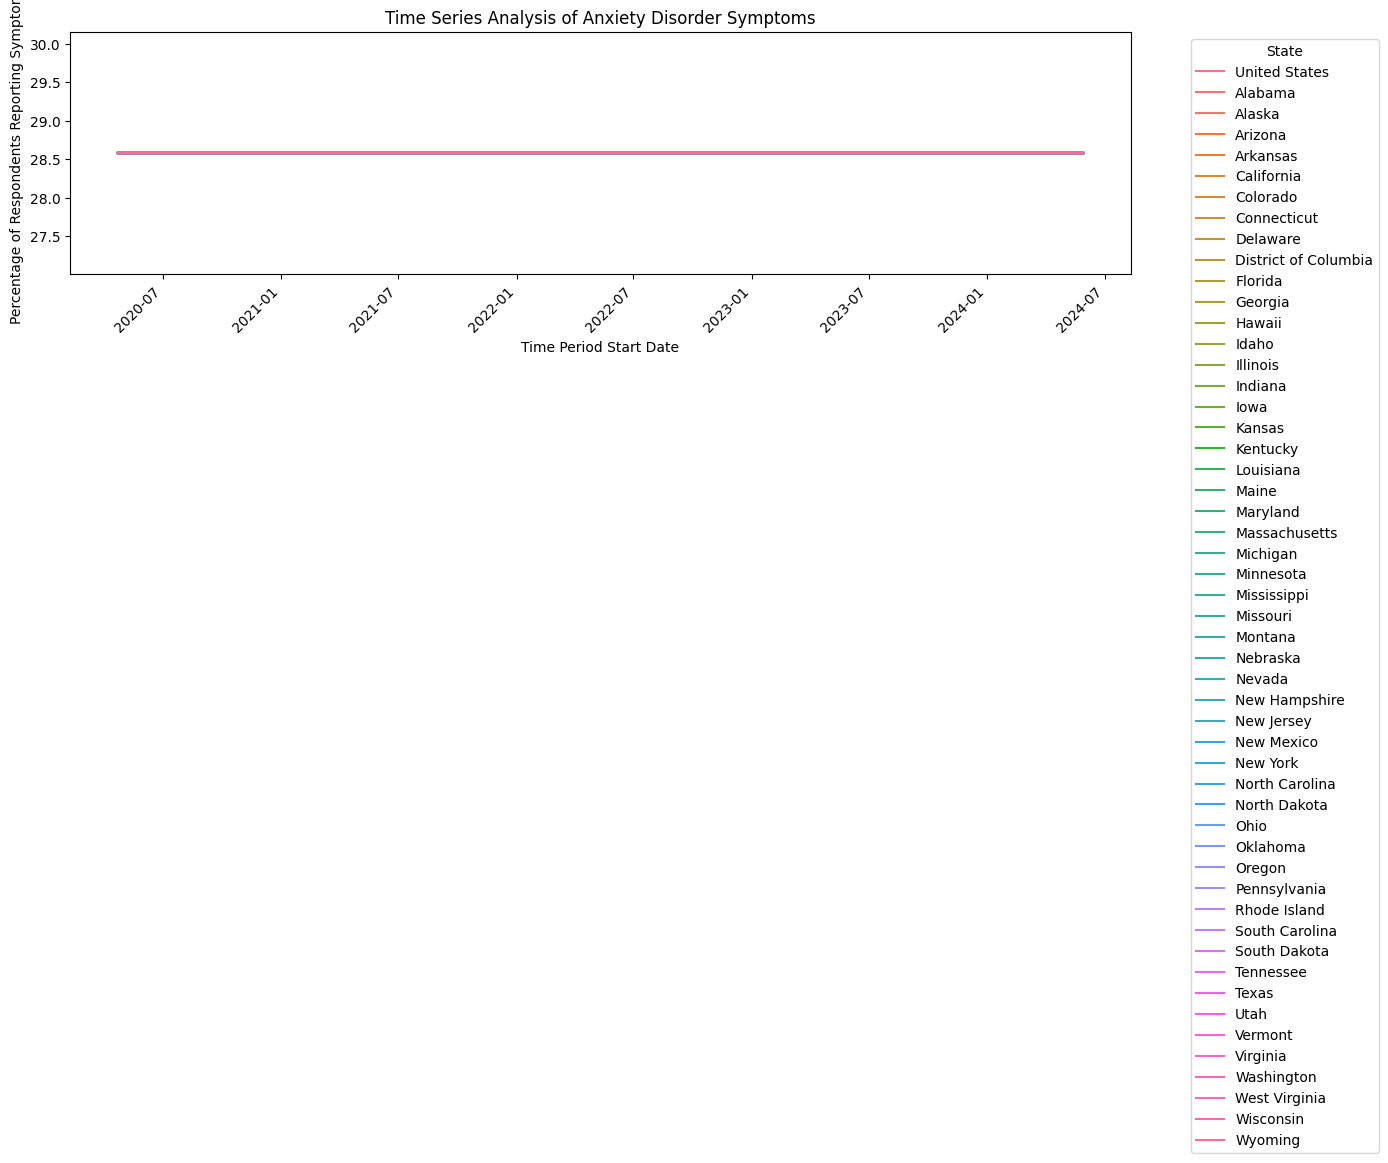

In [78]:

# Ensure 'time period start date' is datetime and 'value' is numeric
df1['time period start date'] = pd.to_datetime(df1['time period start date'])
df1['value'] = pd.to_numeric(df1['value'], errors='coerce')

# Filter data for a specific indicator if needed (e.g., 'Symptoms of Anxiety Disorder')
indicator_data = df1[df1['indicator'] == 'Symptoms of Anxiety Disorder']

plt.figure(figsize=(14, 8))
sns.lineplot(data=indicator_data, x='time period start date', y='value', hue='state')
plt.title('Time Series Analysis of Anxiety Disorder Symptoms')
plt.xlabel('Time Period Start Date')
plt.ylabel('Percentage of Respondents Reporting Symptoms')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


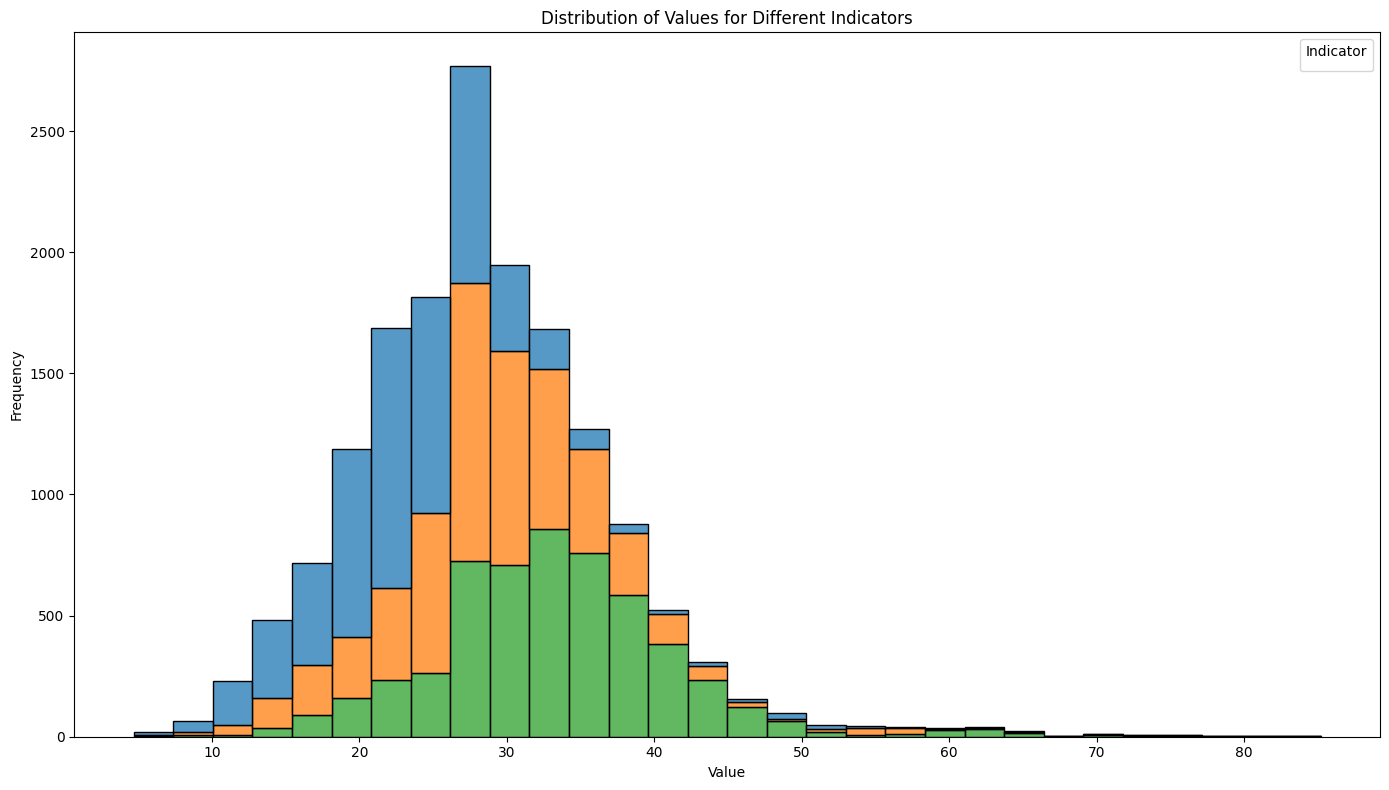

In [196]:
# Visualize the distribution of values for different indicators.
plt.figure(figsize=(14, 8))
sns.histplot(data=df1, x='value', hue='indicator', multiple='stack', bins=30)
plt.title('Distribution of Values for Different Indicators')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()


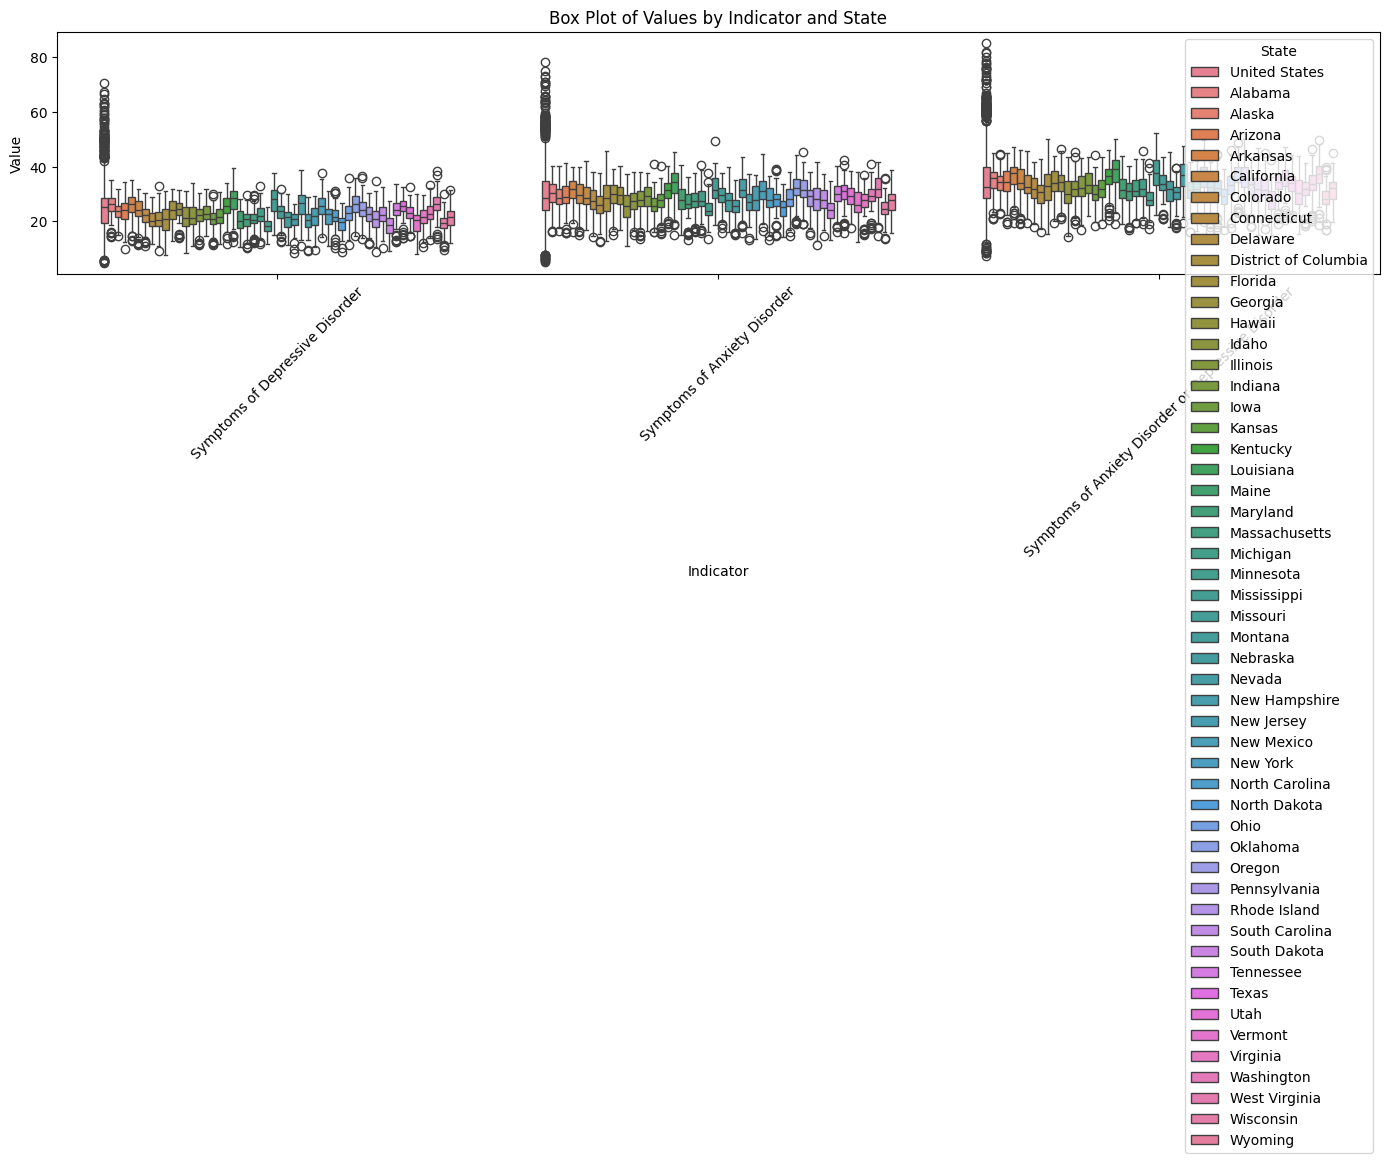

In [197]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df1, x='indicator', y='value',hue='state')
plt.title('Box Plot of Values by Indicator and State')
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()


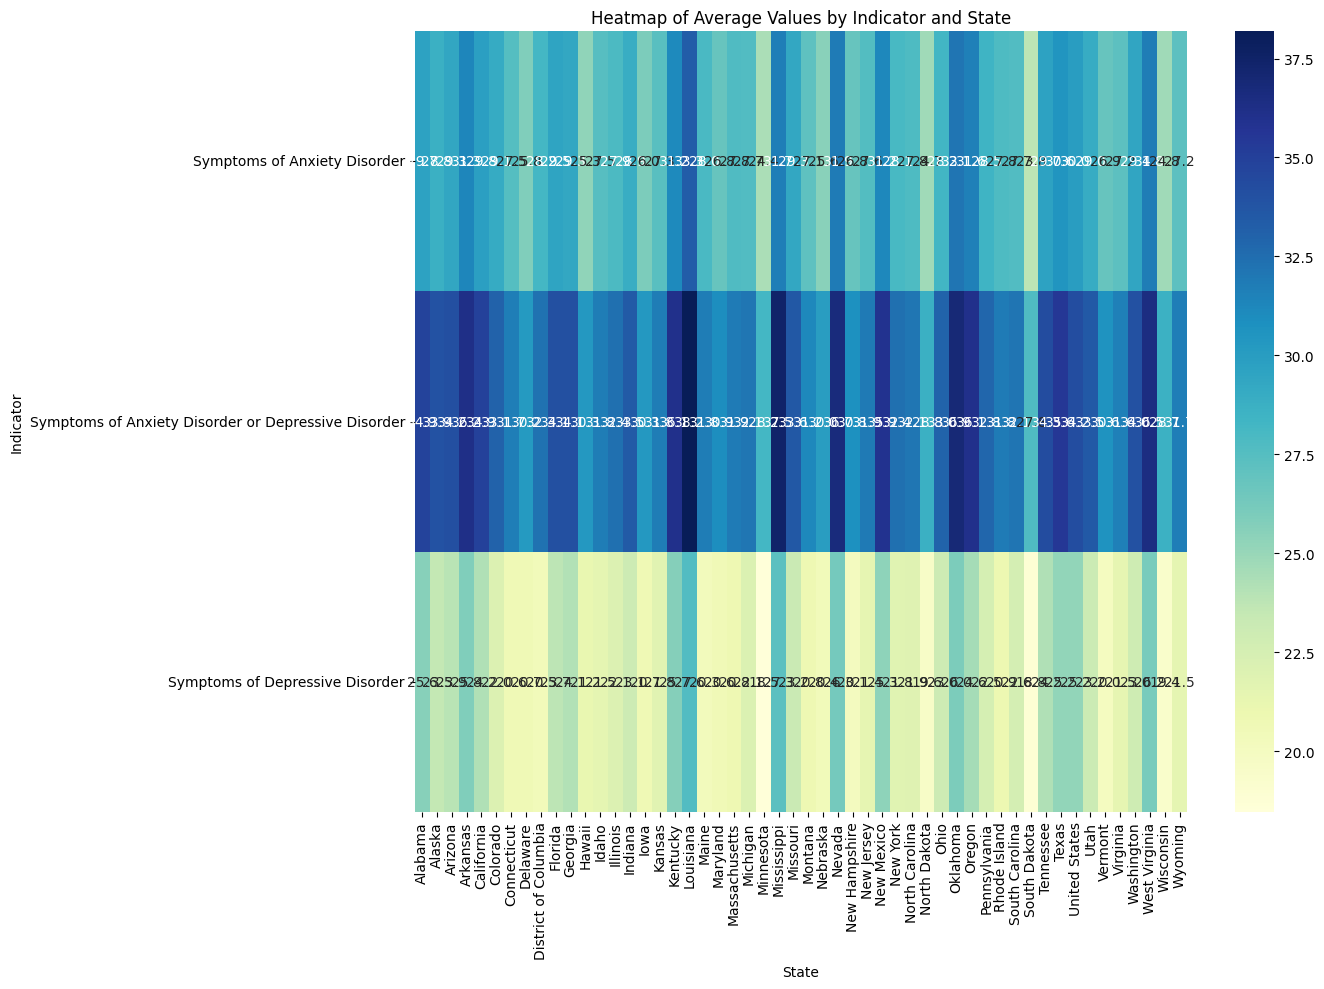

In [198]:
# Pivot table to get the average value
pivot_table = df1.pivot_table(index='indicator', columns='state', values='value', aggfunc=np.mean)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap of Average Values by Indicator and State')
plt.xlabel('State')
plt.ylabel('Indicator')
plt.tight_layout()
plt.show()


In [199]:
# # Extract year from 'time period start date'
# df1['year'] = df1['time period start date'].dt.year

# # Group by year and calculate mean values
yearly_data = df1.groupby('year').agg({'value': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_data, x='year', y='value')
plt.title('Average Value of Symptoms Reported Each Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'year'

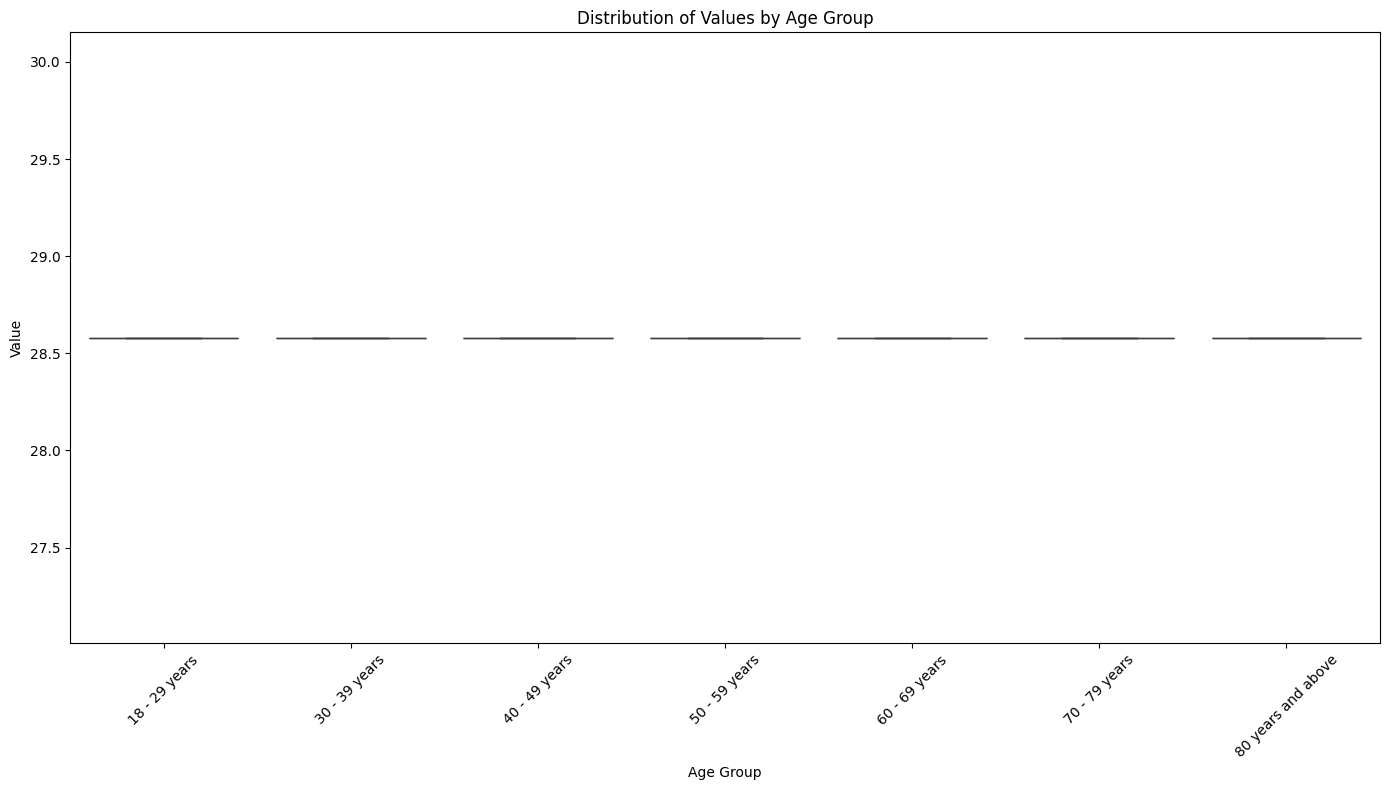

In [201]:
# Distribution of Values by Age Group
plt.figure(figsize=(14, 8))
sns.boxplot(data=age_group_data, x='subgroup', y='value')
plt.title('Distribution of Values by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
